### Imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

### This the the cleaned dataset (provided by SJ)I'll be working with

In [87]:
# read the file
df = pd.read_csv("femadf.csv")

In [53]:
# check the first few rows
df.head()

,Unnamed: 0,Disaster Number,IH Program Declared,IA Program Declared,PA Program Declared,HM Program Declared,StateCode,Declaration Date,Disaster Type,Incident Type,Title,Incident Begin Date,Declared County/Area,Declaration Request Number,State,Updated County Info,County FIPS Code
0,0,4419,Yes,No,Yes,Yes,AL,3/5/2019,DR,Tornado,"SEVERE STORMS, STRAIGHT-LINE WINDS, AND TORNADOES",3/3/2019,Lee (County),19006,Alabama,Lee County,1081
1,1,4418,No,No,Yes,Yes,WA,3/4/2019,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",12/10/2018,Clallam (County),19005,Washington,Clallam County,53009
2,2,4418,No,No,Yes,Yes,WA,3/4/2019,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",12/10/2018,Grays Harbor (County),19005,Washington,Grays Harbor County,53027
3,3,4418,No,No,Yes,Yes,WA,3/4/2019,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",12/10/2018,Island (County),19005,Washington,Island County,53029
4,4,4418,No,No,Yes,Yes,WA,3/4/2019,DR,Severe Storm(s),"SEVERE WINTER STORMS, STRAIGHT-LINE WINDS, FLO...",12/10/2018,Jefferson (County),19005,Washington,Jefferson County,53031


In [37]:
# check the data dtype
df.dtypes

Unnamed: 0                     int64
Disaster Number                int64
IH Program Declared           object
IA Program Declared           object
PA Program Declared           object
HM Program Declared           object
StateCode                     object
Declaration Date              object
Disaster Type                 object
Incident Type                 object
Title                         object
Incident Begin Date           object
Declared County/Area          object
Declaration Request Number     int64
State                         object
Updated County Info           object
County FIPS Code               int64
dtype: object

In [38]:
# check the columns names
df.columns

Index(['Unnamed: 0', 'Disaster Number', 'IH Program Declared',
       'IA Program Declared', 'PA Program Declared', 'HM Program Declared',
       'StateCode', 'Declaration Date', 'Disaster Type', 'Incident Type',
       'Title', 'Incident Begin Date', 'Declared County/Area',
       'Declaration Request Number', 'State', 'Updated County Info',
       'County FIPS Code'],
      dtype='object')

### Let's create a dataframe with select columns

In [54]:
df_usable_columns = df[['IH Program Declared',
       'IA Program Declared', 'PA Program Declared', 'HM Program Declared',
       'StateCode', 'Incident Type',
       'Incident Begin Date', 'State', 'Updated County Info',
       'County FIPS Code']]

In [55]:
# check the df
df_usable_columns.head()

,IH Program Declared,IA Program Declared,PA Program Declared,HM Program Declared,StateCode,Incident Type,Incident Begin Date,State,Updated County Info,County FIPS Code
0,Yes,No,Yes,Yes,AL,Tornado,3/3/2019,Alabama,Lee County,1081
1,No,No,Yes,Yes,WA,Severe Storm(s),12/10/2018,Washington,Clallam County,53009
2,No,No,Yes,Yes,WA,Severe Storm(s),12/10/2018,Washington,Grays Harbor County,53027
3,No,No,Yes,Yes,WA,Severe Storm(s),12/10/2018,Washington,Island County,53029
4,No,No,Yes,Yes,WA,Severe Storm(s),12/10/2018,Washington,Jefferson County,53031


In [41]:
# check for missing values
df_usable_columns.isna().sum()

IH Program Declared    0
IA Program Declared    0
PA Program Declared    0
HM Program Declared    0
StateCode              0
Incident Type          0
Incident Begin Date    0
State                  0
Updated County Info    0
County FIPS Code       0
dtype: int64

In [25]:
# check the shape of the file
df.shape

(47540, 17)

### Manually encoding Yes and No as 1 and 0

In [56]:
df_usable_columns['IH Program Declared'] = df_usable_columns['IH Program Declared'].map(dict(Yes=1, No=0))

In [57]:
df_usable_columns['IA Program Declared'] = df_usable_columns['IA Program Declared'].map(dict(Yes=1, No=0))

In [58]:
df_usable_columns['PA Program Declared'] = df_usable_columns['PA Program Declared'].map(dict(Yes=1, No=0))

In [60]:
df_usable_columns['HM Program Declared'] = df_usable_columns['HM Program Declared'].map(dict(Yes=1, No=0))

### Write a small program to encode yes and No with 1 and 0

In [98]:
def yes_no_encoder(df):
    for each_col in df.columns[0:4]:
#         print(each_col)
         df[each_col] = df[each_col].map(dict(Yes=1, No=0))
    return df

In [61]:
df_usable_columns.head()

,IH Program Declared,IA Program Declared,PA Program Declared,HM Program Declared,StateCode,Incident Type,Incident Begin Date,State,Updated County Info,County FIPS Code
0,1,0,1,1,AL,Tornado,3/3/2019,Alabama,Lee County,1081
1,0,0,1,1,WA,Severe Storm(s),12/10/2018,Washington,Clallam County,53009
2,0,0,1,1,WA,Severe Storm(s),12/10/2018,Washington,Grays Harbor County,53027
3,0,0,1,1,WA,Severe Storm(s),12/10/2018,Washington,Island County,53029
4,0,0,1,1,WA,Severe Storm(s),12/10/2018,Washington,Jefferson County,53031


In [100]:
df_usable_columns.dtypes

IH Program Declared     int64
IA Program Declared     int64
PA Program Declared     int64
HM Program Declared     int64
StateCode              object
Incident Type          object
Incident Begin Date    object
State                  object
Updated County Info    object
County FIPS Code        int64
dtype: object

### Changing the dat into datetime

In [129]:
df_usable_columns['Incident Begin Date'] = pd.to_datetime(df_usable_columns['Incident Begin Date'])

In [130]:
df_usable_columns.head()

,IH Program Declared,IA Program Declared,PA Program Declared,HM Program Declared,StateCode,Incident Type,Incident Begin Date,State,Updated County Info,County FIPS Code
0,1,0,1,1,AL,Tornado,2019-03-03,Alabama,Lee County,1081
1,0,0,1,1,WA,Severe Storm(s),2018-12-10,Washington,Clallam County,53009
2,0,0,1,1,WA,Severe Storm(s),2018-12-10,Washington,Grays Harbor County,53027
3,0,0,1,1,WA,Severe Storm(s),2018-12-10,Washington,Island County,53029
4,0,0,1,1,WA,Severe Storm(s),2018-12-10,Washington,Jefferson County,53031


In [131]:
# Let's explore storms data
storms = df_usable_columns.loc[df_usable_columns['Incident Type'] =="Severe Storm(s)"]

In [132]:
storms['Incident Begin Date'].min(), storms['Incident Begin Date'].max()

(Timestamp('1956-04-24 00:00:00'), Timestamp('2018-12-27 00:00:00'))

### Indexing and Time Series Data

In [150]:
storms = df_usable_columns.groupby('Incident Begin Date')
df_usable_columns['Incident Type'].value_counts().reset_index()

,index,Incident Type
0,Severe Storm(s),15866
1,Hurricane,9943
2,Flood,9571
3,Snow,3597
4,Fire,2619
5,Severe Ice Storm,1983
6,Tornado,1412
7,Drought,1234
8,Coastal Storm,460
9,Other,294


In [145]:
df_index = df_usable_columns.set_index('Incident Begin Date')
df_index.index

DatetimeIndex(['2019-03-03', '2018-12-10', '2018-12-10', '2018-12-10',
               '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10',
               '2018-12-10', '2018-10-04',
               ...
               '1953-07-02', '1953-06-19', '1953-06-11', '1953-06-11',
               '1953-06-09', '1953-06-06', '1953-06-02', '1953-05-29',
               '1953-05-15', '1953-05-02'],
              dtype='datetime64[ns]', name='Incident Begin Date', length=47540, freq=None)

In [151]:
y = df_usable_columns['Incident Type'].value_counts()

In [139]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

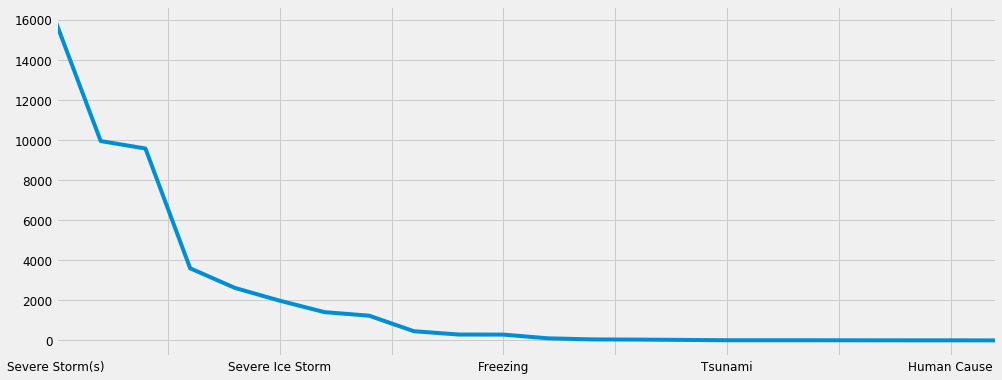

In [152]:
y.plot(figsize=(15, 6))
plt.show()

In [158]:
# df_usable_columns.groupby("Updated County Info")['Incident Type'].value_counts().plot(kind='bar')

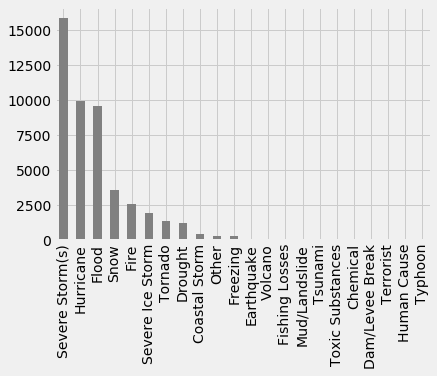

In [114]:
df_usable_columns['Incident Type'].value_counts().plot(kind='bar', color='grey')

In [ ]:
df = df_usable_columns

In [116]:
import seaborn as sns

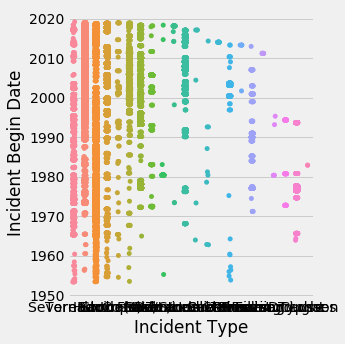

In [119]:
sns.catplot(x="Incident Type", y="Incident Begin Date", data=df_usable_columns);

In [159]:
ls

data.gov.FEMADeclarations.3.15.19.xlsx
disaster-nodes-by-state.csv
Eathquake_Data/
fema_dataset.csv
femadf.csv
incidentdf.csv
incidentdf_year.csv
NOA_files/
NOA_files_csv/
storm_data_search_results.csv
StormEvents_details-ftp_v1.0_d1996_c20170717.csv
StormEvents_locations-ftp_v1.0_d1990_c20170717.csv
Time_series_on_cleaned_data.ipynb
US_counties_info/
us-county-names.csv
us-county-names.tsv
us-state-names.csv
us-state-names.tsv
Working_with_FEMA_Dataset.ipynb


In [160]:
df_1 = pd.read_csv('incidentdf_year.csv')

In [164]:
df_1.head(200)

,Year,County FIPS Code,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,Hurricane,Mud/Landslide,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,1959,18021,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1964,6003,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1964,6005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1964,6007,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1964,6011,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1964,6015,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1964,6017,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1964,6021,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1964,6023,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1964,6033,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [162]:
df_1.shape

(37062, 24)

In [163]:
df_1.Drought.value_counts()

0    35838
1     1216
2        8
Name: Drought, dtype: int64